In [1]:
import pandas as pd

In [2]:
pvgis = pd.read_csv("pvgis.csv", skiprows=10)
nasa = pd.read_csv("nasa.csv", skiprows=16)

In [3]:
import pandas as pd
import re

rows = []
with open("pvgis.csv") as f:
    for line in f:
        if re.match(r"^\d{8}:\d{4}", line):
            rows.append(line)

# parse filtered rows as csv
import io
pvgis = pd.read_csv(io.StringIO(''.join(rows)), header=None)


In [4]:
pvgis.columns = ["time","P","G_i","H_sun","T2m","WS10m","Int"]

In [5]:
pvgis

,time,P,G_i,H_sun,T2m,WS10m,Int
0,20150101:0030,0.0,0.00,0.00,12.64,2.21,0.0
1,20150101:0130,0.0,0.00,-3.64,12.29,2.28,0.0
2,20150101:0230,941.5,36.69,7.99,11.95,2.41,0.0
3,20150101:0330,4635.5,145.56,18.61,13.08,2.14,0.0
4,20150101:0430,9192.5,258.99,27.70,15.58,1.86,0.0
...,...,...,...,...,...,...,...
52603,20201231:1930,0.0,0.00,0.00,7.35,1.86,0.0
52604,20201231:2030,0.0,0.00,0.00,6.52,1.72,0.0
52605,20201231:2130,0.0,0.00,0.00,5.77,1.79,0.0
52606,20201231:2230,0.0,0.00,0.00,5.21,1.86,0.0


In [6]:
pvgis['time'] = pd.to_datetime(pvgis['time'], format='%Y%m%d:%H%M')

In [7]:
pvgis.head()

,time,P,G_i,H_sun,T2m,WS10m,Int
0,2015-01-01 00:30:00,0.0,0.00,0.00,12.64,2.21,0.0
1,2015-01-01 01:30:00,0.0,0.00,-3.64,12.29,2.28,0.0
2,2015-01-01 02:30:00,941.5,36.69,7.99,11.95,2.41,0.0
3,2015-01-01 03:30:00,4635.5,145.56,18.61,13.08,2.14,0.0
4,2015-01-01 04:30:00,9192.5,258.99,27.70,15.58,1.86,0.0


In [8]:
nasa.head()

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,T2M,RH2M,WS10M,WD10M,PS,PSC
0,2015,1,1,0,0.00,0.00,8.34,51.34,2.17,358.4,98.99,98.84
1,2015,1,1,1,0.00,0.00,8.34,50.93,2.09,354.0,99.05,98.90
2,2015,1,1,2,45.15,84.55,9.38,51.01,1.84,348.7,99.12,98.97
3,2015,1,1,3,135.02,249.30,12.21,38.60,1.93,344.1,99.21,99.06
4,2015,1,1,4,231.40,410.02,14.49,32.99,1.42,340.3,99.26,99.11


In [9]:
print(nasa.columns.tolist())


['YEAR', 'MO', 'DY', 'HR', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'T2M', 'RH2M', 'WS10M', 'WD10M', 'PS', 'PSC']


In [10]:
nasa['time'] = pd.to_datetime(
    dict(
        year=nasa['YEAR'],
        month=nasa['MO'],
        day=nasa['DY'],
        hour=nasa['HR']
    )
)


In [11]:
nasa["time"]

0       2015-01-01 00:00:00
1       2015-01-01 01:00:00
2       2015-01-01 02:00:00
3       2015-01-01 03:00:00
4       2015-01-01 04:00:00
                ...        
52603   2020-12-31 19:00:00
52604   2020-12-31 20:00:00
52605   2020-12-31 21:00:00
52606   2020-12-31 22:00:00
52607   2020-12-31 23:00:00
Name: time, Length: 52608, dtype: datetime64[ns]

In [12]:
nasa = nasa.drop(columns=['YEAR','MO','DY','HR'])


In [13]:
nasa = nasa.sort_values('time').reset_index(drop=True)

In [14]:
nasa.head()

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,T2M,RH2M,WS10M,WD10M,PS,PSC,time
0,0.00,0.00,8.34,51.34,2.17,358.4,98.99,98.84,2015-01-01 00:00:00
1,0.00,0.00,8.34,50.93,2.09,354.0,99.05,98.90,2015-01-01 01:00:00
2,45.15,84.55,9.38,51.01,1.84,348.7,99.12,98.97,2015-01-01 02:00:00
3,135.02,249.30,12.21,38.60,1.93,344.1,99.21,99.06,2015-01-01 03:00:00
4,231.40,410.02,14.49,32.99,1.42,340.3,99.26,99.11,2015-01-01 04:00:00


<Axes: >

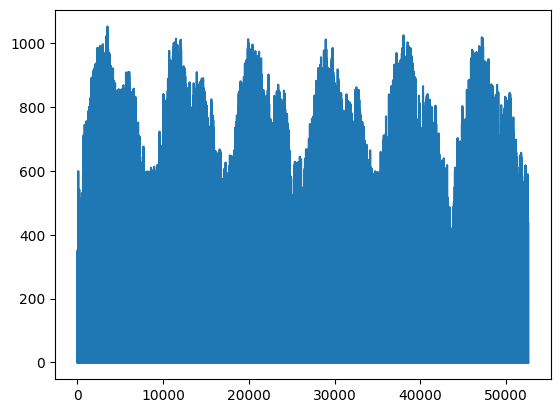

In [15]:
import matplotlib.pyplot as plt 
nasa['ALLSKY_SFC_SW_DWN'].plot()


In [16]:
nasa_30min = nasa.set_index('time').resample('30T').interpolate().reset_index()


/tmp/ipykernel_463883/3282647567.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  nasa_30min = nasa.set_index('time').resample('30T').interpolate().reset_index()


In [17]:
nasa_30min

,time,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,T2M,RH2M,WS10M,WD10M,PS,PSC
0,2015-01-01 00:00:00,0.000,0.000,8.340,51.340,2.170,358.40,98.990,98.840
1,2015-01-01 00:30:00,0.000,0.000,8.340,51.135,2.130,356.20,99.020,98.870
2,2015-01-01 01:00:00,0.000,0.000,8.340,50.930,2.090,354.00,99.050,98.900
3,2015-01-01 01:30:00,22.575,42.275,8.860,50.970,1.965,351.35,99.085,98.935
4,2015-01-01 02:00:00,45.150,84.550,9.380,51.010,1.840,348.70,99.120,98.970
...,...,...,...,...,...,...,...,...,...
105210,2020-12-31 21:00:00,0.000,0.000,6.700,42.240,2.410,333.30,98.970,98.820
105211,2020-12-31 21:30:00,0.000,0.000,6.355,43.435,2.400,338.40,98.965,98.815
105212,2020-12-31 22:00:00,0.000,0.000,6.010,44.630,2.390,343.50,98.960,98.810
105213,2020-12-31 22:30:00,0.000,0.000,5.855,45.295,2.310,347.35,98.970,98.820


In [18]:
df = pvgis.merge(nasa_30min, on='time', how='inner')

In [19]:
df.head()

,time,P,G_i,H_sun,T2m,WS10m,Int,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,T2M,RH2M,WS10M,WD10M,PS,PSC
0,2015-01-01 00:30:00,0.0,0.00,0.00,12.64,2.21,0.0,0.000,0.000,8.340,51.135,2.130,356.20,99.020,98.870
1,2015-01-01 01:30:00,0.0,0.00,-3.64,12.29,2.28,0.0,22.575,42.275,8.860,50.970,1.965,351.35,99.085,98.935
2,2015-01-01 02:30:00,941.5,36.69,7.99,11.95,2.41,0.0,90.085,166.925,10.795,44.805,1.885,346.40,99.165,99.015
3,2015-01-01 03:30:00,4635.5,145.56,18.61,13.08,2.14,0.0,183.210,329.660,13.350,35.795,1.675,342.20,99.235,99.085
4,2015-01-01 04:30:00,9192.5,258.99,27.70,15.58,1.86,0.0,244.875,468.925,16.360,30.435,1.380,343.25,99.230,99.080


In [20]:
df.columns

Index(['time', 'P', 'G_i', 'H_sun', 'T2m', 'WS10m', 'Int', 'ALLSKY_SFC_SW_DWN',
       'CLRSKY_SFC_SW_DWN', 'T2M', 'RH2M', 'WS10M', 'WD10M', 'PS', 'PSC'],
      dtype='object')

In [21]:
df.rename(columns={'T2m':'T2m_pvgis','T2M':'T2m_nasa'}, inplace=True)
df.rename(columns={'WS10m':'WS10m_pvgis','WS10M':'WS10m_nasa'}, inplace=True)

In [22]:
df.rename(columns={'G_i':'G_pv','ALLSKY_SFC_SW_DWN':'G_allsky','CLRSKY_SFC_SW_DWN':'G_clrsky'}, inplace=True)

In [23]:
df['CSR'] = df['G_allsky'] / df['G_clrsky']

In [24]:
df['T2m_avg'] = (df['T2m_pvgis'] + df['T2m_nasa']) / 2
df['T2m_diff'] = df['T2m_pvgis'] - df['T2m_nasa']

In [25]:
df.head()

,time,P,G_pv,H_sun,T2m_pvgis,WS10m_pvgis,Int,G_allsky,G_clrsky,T2m_nasa,RH2M,WS10m_nasa,WD10M,PS,PSC,CSR,T2m_avg,T2m_diff
0,2015-01-01 00:30:00,0.0,0.00,0.00,12.64,2.21,0.0,0.000,0.000,8.340,51.135,2.130,356.20,99.020,98.870,NaN,10.4900,4.300
1,2015-01-01 01:30:00,0.0,0.00,-3.64,12.29,2.28,0.0,22.575,42.275,8.860,50.970,1.965,351.35,99.085,98.935,0.534004,10.5750,3.430
2,2015-01-01 02:30:00,941.5,36.69,7.99,11.95,2.41,0.0,90.085,166.925,10.795,44.805,1.885,346.40,99.165,99.015,0.539674,11.3725,1.155
3,2015-01-01 03:30:00,4635.5,145.56,18.61,13.08,2.14,0.0,183.210,329.660,13.350,35.795,1.675,342.20,99.235,99.085,0.555754,13.2150,-0.270
4,2015-01-01 04:30:00,9192.5,258.99,27.70,15.58,1.86,0.0,244.875,468.925,16.360,30.435,1.380,343.25,99.230,99.080,0.522205,15.9700,-0.780


In [26]:
df.shape

(52607, 18)

In [27]:
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.dayofyear
df['weekday'] = df['time'].dt.weekday

In [28]:
import numpy as np

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 365)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 365)

In [29]:
df.sort_values('time')

,time,P,G_pv,H_sun,T2m_pvgis,WS10m_pvgis,Int,G_allsky,G_clrsky,T2m_nasa,...,T2m_avg,T2m_diff,hour,month,day,weekday,hour_sin,hour_cos,day_sin,day_cos
0,2015-01-01 00:30:00,0.0,0.00,0.00,12.64,2.21,0.0,0.000,0.000,8.340,...,10.4900,4.300,0,1,1,3,0.000000,1.000000e+00,0.017213,0.999852
1,2015-01-01 01:30:00,0.0,0.00,-3.64,12.29,2.28,0.0,22.575,42.275,8.860,...,10.5750,3.430,1,1,1,3,0.258819,9.659258e-01,0.017213,0.999852
2,2015-01-01 02:30:00,941.5,36.69,7.99,11.95,2.41,0.0,90.085,166.925,10.795,...,11.3725,1.155,2,1,1,3,0.500000,8.660254e-01,0.017213,0.999852
3,2015-01-01 03:30:00,4635.5,145.56,18.61,13.08,2.14,0.0,183.210,329.660,13.350,...,13.2150,-0.270,3,1,1,3,0.707107,7.071068e-01,0.017213,0.999852
4,2015-01-01 04:30:00,9192.5,258.99,27.70,15.58,1.86,0.0,244.875,468.925,16.360,...,15.9700,-0.780,4,1,1,3,0.866025,5.000000e-01,0.017213,0.999852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52602,2020-12-31 18:30:00,0.0,0.00,0.00,8.34,1.79,0.0,0.000,0.000,8.080,...,8.2100,0.260,18,12,366,3,-1.000000,-1.836970e-16,0.017213,0.999852
52603,2020-12-31 19:30:00,0.0,0.00,0.00,7.35,1.86,0.0,0.000,0.000,7.620,...,7.4850,-0.270,19,12,366,3,-0.965926,2.588190e-01,0.017213,0.999852
52604,2020-12-31 20:30:00,0.0,0.00,0.00,6.52,1.72,0.0,0.000,0.000,7.090,...,6.8050,-0.570,20,12,366,3,-0.866025,5.000000e-01,0.017213,0.999852
52605,2020-12-31 21:30:00,0.0,0.00,0.00,5.77,1.79,0.0,0.000,0.000,6.355,...,6.0625,-0.585,21,12,366,3,-0.707107,7.071068e-01,0.017213,0.999852


In [45]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(method='ffill').fillna(method='bfill')

/tmp/ipykernel_463883/1848108259.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


In [46]:
train = df[df['time'] < '2018-01-01']
val = df[(df['time'] >= '2018-01-01') & (df['time'] < '2019-01-01')]
test = df[df['time'] >= '2019-01-01']

In [47]:
print(train.shape, val.shape, test.shape)


(26304, 26) (8760, 26) (17543, 26)


<Axes: xlabel='time'>

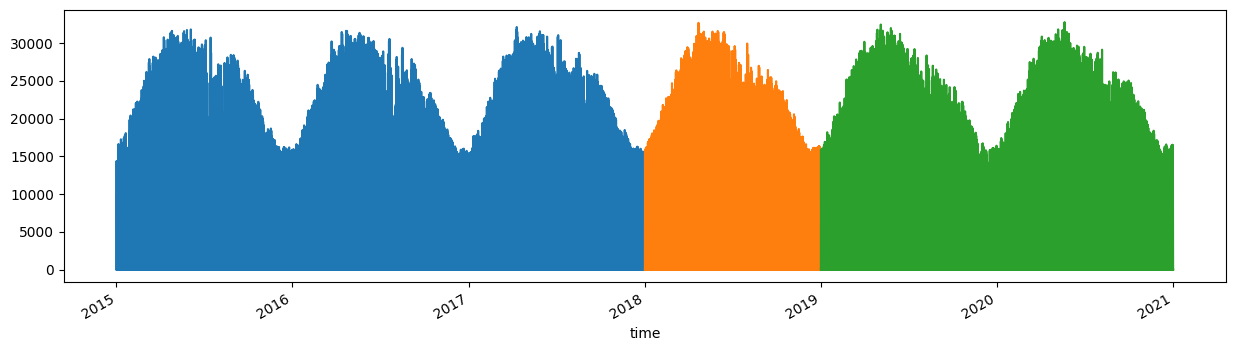

In [48]:
train.set_index('time')['P'].plot(figsize=(15,4), label='train')
val.set_index('time')['P'].plot(figsize=(15,4), label='val')
test.set_index('time')['P'].plot(figsize=(15,4), label='test')


In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
scaler_y = MinMaxScaler()

In [50]:
features = [
    'G_pv',
    'G_allsky', 'G_clrsky', 'CSR',
    'T2m_pvgis', 'T2m_nasa', 'T2m_avg', 'T2m_diff',
    'WS10m_pvgis', 'WS10m_nasa',
    'RH2M',
    'WD10M',
    'PS', 'PSC',
    'hour_sin', 'hour_cos',
    'day_sin', 'day_cos',
    'month', 'weekday'
]
target = ['P']

In [51]:
scaler_x.fit(train[features])
scaler_y.fit(train[target])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [52]:
train_x = scaler_x.transform(train[features])
val_x = scaler_x.transform(val[features])
test_x = scaler_x.transform(test[features])

train_y = scaler_y.transform(train[target])
val_y = scaler_y.transform(val[target])
test_y = scaler_y.transform(test[target])

In [53]:
def create_sliding_windows(X, Y, input_window, output_window):
    Xs, Ys = [], []
    for i in range(len(X) - input_window - output_window):
        Xs.append(X[i:(i + input_window)]) 
        Ys.append(Y[(i + input_window):(i + input_window + output_window)])
    return np.array(Xs), np.array(Ys)

In [54]:
INPUT_WINDOW = 168  #7DAYS
OUTPUT_WINDOW = 24  #1DAY

X_train, Y_train = create_sliding_windows(train_x, train_y, INPUT_WINDOW, OUTPUT_WINDOW)
X_val, Y_val = create_sliding_windows(val_x, val_y, INPUT_WINDOW, OUTPUT_WINDOW)
X_test, Y_test = create_sliding_windows(test_x, test_y, INPUT_WINDOW, OUTPUT_WINDOW)

In [59]:
print(X_train.shape, Y_train.shape)
print(X_val.shape,   Y_val.shape)
print(X_test.shape,  Y_test.shape)


(26112, 168, 20) (26112, 24, 1)
(8568, 168, 20) (8568, 24, 1)
(17351, 168, 20) (17351, 24, 1)


# LSTM

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (168, 20)

model = models.Sequential([
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(24),
    layers.Reshape((24,1))
])

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name='mae'),
        tf.keras.metrics.RootMeanSquaredError(name='rmse')
    ]
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=20,
    batch_size=64
)


Epoch 1/20
408/408 ━━━━━━━━━━━━━━━━━━━━ 76s 180ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 2/20
408/408 ━━━━━━━━━━━━━━━━━━━━ 75s 184ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 3/20
408/408 ━━━━━━━━━━━━━━━━━━━━ 74s 181ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 4/20
408/408 ━━━━━━━━━━━━━━━━━━━━ 77s 189ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 5/20
408/408 ━━━━━━━━━━━━━━━━━━━━ 74s 181ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 6/20
408/408 ━━━━━━━━━━━━━━━━━━━━ 72s 176ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 7/20
408/408 ━━━━━━━━━━━━━━━━━━━━ 72s 176ms/step - loss: nan - mae: nan - rmse: nan - val_loss: nan - val_mae: nan - val_rmse: nan
Epoch 8/20
408/408 ━━━━━━━━━━━━━━━━━━━━ 7

In [61]:
pred_test = model.predict(X_test)

pred_test_inv = scaler_y.inverse_transform(pred_test.reshape(-1,1)).reshape(pred_test.shape)
Y_test_inv    = scaler_y.inverse_transform(Y_test.reshape(-1,1)).reshape(Y_test.shape)


543/543 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(Y_test_inv.flatten(), pred_test_inv.flatten()))
mae  = mean_absolute_error(Y_test_inv.flatten(), pred_test_inv.flatten())


In [65]:
print(f"RMSE:  {rmse:.3f}")
print(f"MAE:   {mae:.3f}")


RMSE:  12573.353
MAE:   9248.838


In [69]:
mask = Y_test_inv > 200   # daylight threshold
mae_day = mean_absolute_error(Y_test_inv[mask], pred_test_inv[mask])
print(f"MAE (daylight): {mae_day:.3f}")

MAE (daylight): 14480.636


In [ ]:
# P is feature index 0 (update if different)
p_idx = 0 

# persistence baseline
persist_pred = X_test[:, -24:, p_idx] 
persist_pred = persist_pred[..., None]

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# flatten for metrics
rmse_p = np.sqrt(mean_squared_error(Y_test_inv.flatten(), persist_pred.flatten()))
mae_p  = mean_absolute_error(Y_test_inv.flatten(), persist_pred.flatten())

print(f"Persistence RMSE: {rmse_p:.3f}")
print(f"Persistence MAE:  {mae_p:.3f}")


Persistence RMSE: 11268.640
Persistence MAE:  6632.707


In [73]:
mask = Y_test_inv > 200  # daylight threshold
mae_p_day = mean_absolute_error(Y_test_inv[mask], persist_pred[mask])
print(f"Persistence MAE (daylight): {mae_p_day:.3f}")


Persistence MAE (daylight): 13606.422


In [74]:
skill = 1 - (mae_day / mae_p_day)
print(f"Skill Score vs Persistence: {skill:.3f}")


Skill Score vs Persistence: -0.064


Negative skill means:

LSTM is worse than persistence baseline

In academic terms, this means:

LSTM baseline is not meaningful improvement

In [75]:
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle = pos * angle_rates

    # apply sin to even indices in the array; 2i
    angle[:, 0::2] = np.sin(angle[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle[:, 1::2] = np.cos(angle[:, 1::2])

    return tf.cast(angle, dtype=tf.float32)


In [76]:
class TransformerBlock(layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super().__init__()
        self.mha = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            layers.Dense(dff, activation='relu'),
            layers.Dense(d_model)
        ])
        self.layernorm1 = layers.LayerNormalization()
        self.layernorm2 = layers.LayerNormalization()
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
    
    def call(self, x, training=False):
        attn_output = self.mha(x, x)
        out1 = self.layernorm1(x + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

In [77]:
SEQ_LEN = 168
FEAT_DIM = X_train.shape[-1]
D_MODEL = 64


In [78]:
inputs = layers.Input(shape=(INPUT_WINDOW, len(features)))

x = layers.Dense(D_MODEL)(inputs)
x = x + positional_encoding(SEQ_LEN, D_MODEL)

for _ in range(2):
    x = TransformerBlock(D_MODEL, num_heads=4, dff=128)(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(24)(x)
outputs = layers.Reshape((24,1))(x)

transformer_model = tf.keras.Model(inputs=inputs, outputs=outputs)

transformer_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='mse',
    metrics=['mae']
)

transformer_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 168, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 168, 64)        │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ add (Add)                       │ (None, 168, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 168, 64)        │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ (None, 168, 64)        │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 24, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,304 (661.34 KB)

 Trainable params: 169,304 (661.34 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3
)


In [81]:
history_t = transformer_model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early, reduce_lr]
)

Epoch 1/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 111s 265ms/step - loss: 0.0984 - mae: 0.2478 - val_loss: 0.0459 - val_mae: 0.1715 - learning_rate: 1.0000e-04
Epoch 2/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 112s 275ms/step - loss: 0.0200 - mae: 0.1106 - val_loss: 0.0108 - val_mae: 0.0800 - learning_rate: 1.0000e-04
Epoch 3/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 109s 267ms/step - loss: 0.0086 - mae: 0.0700 - val_loss: 0.0069 - val_mae: 0.0609 - learning_rate: 1.0000e-04
Epoch 4/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 111s 272ms/step - loss: 0.0066 - mae: 0.0600 - val_loss: 0.0058 - val_mae: 0.0543 - learning_rate: 1.0000e-04
Epoch 5/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 115s 281ms/step - loss: 0.0058 - mae: 0.0553 - val_loss: 0.0051 - val_mae: 0.0500 - learning_rate: 1.0000e-04
Epoch 6/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 110s 270ms/step - loss: 0.0053 - mae: 0.0522 - val_loss: 0.0049 - val_mae: 0.0488 - learning_rate: 1.0000e-04
Epoch 7/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 107s 262ms/step - loss: 0.0050 - mae: 0.0500 - val_loss: 0.0

In [82]:
pred_t = transformer_model.predict(X_test)

pred_t_inv = scaler_y.inverse_transform(
    pred_t.reshape(-1,1)
).reshape(pred_t.shape)

Y_test_inv = scaler_y.inverse_transform(
    Y_test.reshape(-1,1)
).reshape(Y_test.shape)


543/543 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step


In [83]:
rmse_t = np.sqrt(mean_squared_error(Y_test_inv.flatten(), pred_t_inv.flatten()))
mae_t  = mean_absolute_error(Y_test_inv.flatten(), pred_t_inv.flatten())

mask = Y_test_inv > 200
mae_t_day = mean_absolute_error(Y_test_inv[mask], pred_t_inv[mask])

print(f"Transformer RMSE: {rmse_t:.3f}")
print(f"Transformer MAE:  {mae_t:.3f}")
print(f"Transformer MAE (daylight):  {mae_t_day:.3f}")


Transformer RMSE: 1812.867
Transformer MAE:  1107.209
Transformer MAE (daylight):  1682.306


In [86]:
skill_tp = 1- (mae_t_day / mae_p_day)
skill_tl = 1- (mae_t_day / mae_day)

print(f"Transformer Skill vs Persistence: {skill_tp:.3f}")
print(f"Transformer Skill vs LSTM:{skill_tl:.3f}")

Transformer Skill vs Persistence: 0.876
Transformer Skill vs LSTM:0.884


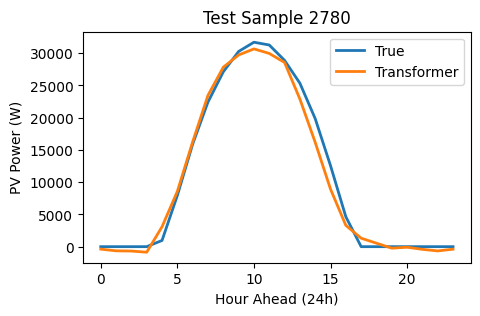

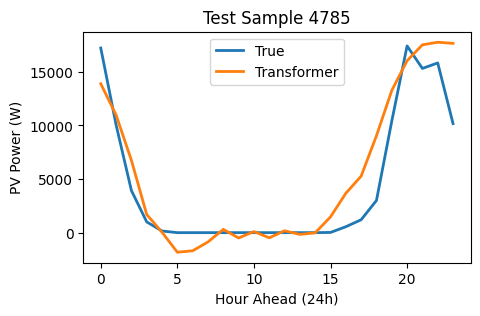

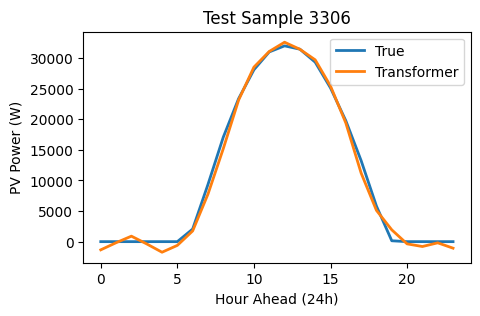

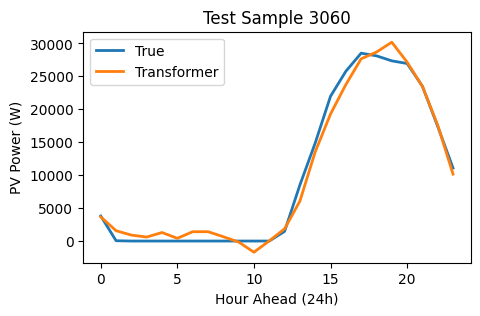

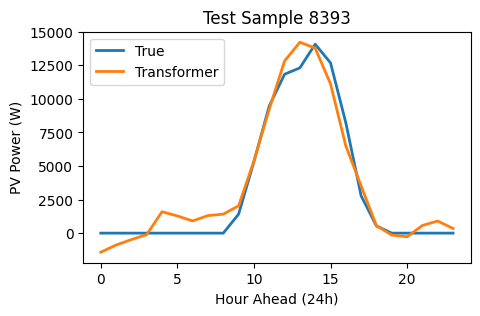

In [88]:
for i in np.random.randint(0, len(pred_t_inv), 5):
    plt.figure(figsize=(5,3))
    plt.plot(Y_test_inv[i], label='True', lw=2)
    plt.plot(pred_t_inv[i], label='Transformer', lw=2)
    plt.title(f"Test Sample {i}")
    plt.xlabel("Hour Ahead (24h)")
    plt.ylabel("PV Power (W)")
    plt.legend()
    plt.show()


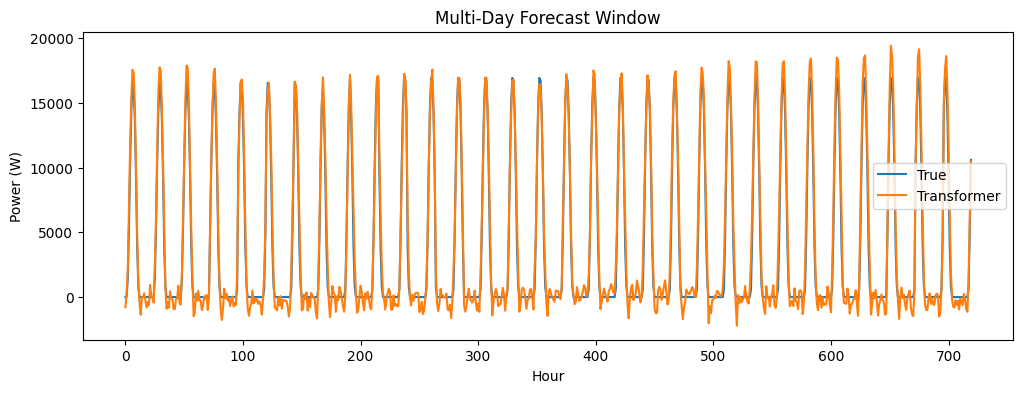

In [89]:
plt.figure(figsize=(12,4))
plt.plot(Y_test_inv[:30].reshape(-1), label='True')
plt.plot(pred_t_inv[:30].reshape(-1), label='Transformer')
plt.title("Multi-Day Forecast Window")
plt.xlabel("Hour")
plt.ylabel("Power (W)")
plt.legend()
plt.show()


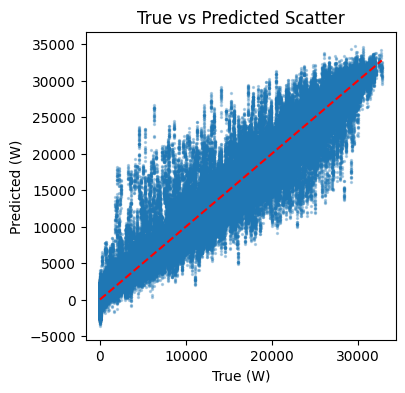

In [90]:
plt.figure(figsize=(4,4))
plt.scatter(Y_test_inv.flatten(), pred_t_inv.flatten(), s=2, alpha=0.3)
plt.xlabel("True (W)")
plt.ylabel("Predicted (W)")
plt.title("True vs Predicted Scatter")
plt.plot([0, Y_test_inv.max()], [0, Y_test_inv.max()], 'r--')
plt.show()


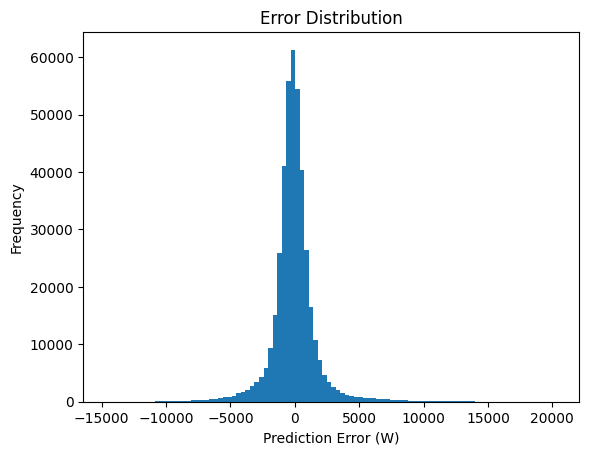

In [91]:
errors = pred_t_inv.flatten() - Y_test_inv.flatten()
plt.hist(errors, bins=100)
plt.title("Error Distribution")
plt.xlabel("Prediction Error (W)")
plt.ylabel("Frequency")
plt.show()


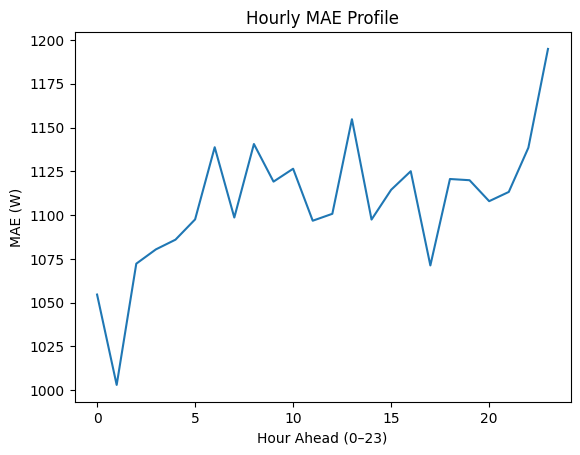

In [92]:
hourly_mae = np.mean(np.abs(pred_t_inv - Y_test_inv), axis=0)
plt.plot(hourly_mae)
plt.xlabel("Hour Ahead (0–23)")
plt.ylabel("MAE (W)")
plt.title("Hourly MAE Profile")
plt.show()


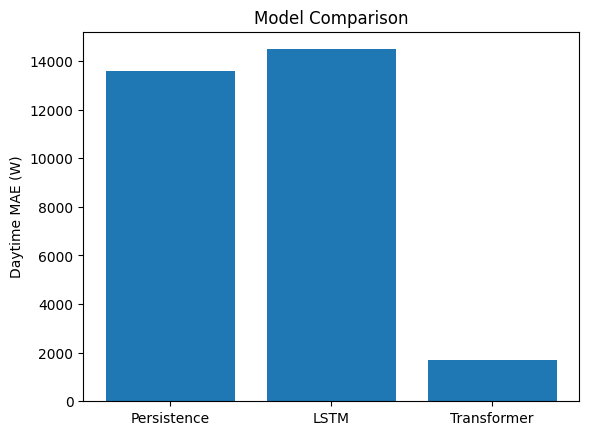

In [95]:
models = ['Persistence', 'LSTM', 'Transformer']
mae_day_values = [mae_p_day, mae_day, mae_t_day]

plt.bar(models, mae_day_values)
plt.ylabel("Daytime MAE (W)")
plt.title("Model Comparison")
plt.show()


In [97]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Persistence', 'LSTM', 'Transformer'],
    'MAE_day': [mae_p_day, mae_day, mae_t_day],
    'RMSE': [rmse_p, rmse, rmse_t],
    'Skill': ['-', skill, skill_tp]
})

print(results)


         Model       MAE_day          RMSE     Skill
0  Persistence  13606.422043  11268.640179         -
1         LSTM  14480.636289  12573.352652  -0.06425
2  Transformer   1682.306351   1812.866929  0.876359


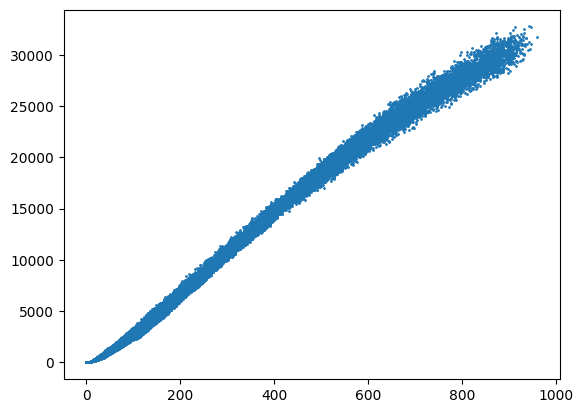

In [98]:
plt.scatter(df['G_pv'], df['P'], s=1)


# Final Metrics

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def compute_metrics(y_true, y_pred, mask):
    mae = mean_absolute_error(y_true.flatten(), y_pred.flatten())
    rmse = np.sqrt(mean_squared_error(y_true.flatten(), y_pred.flatten()))
    mae_day = mean_absolute_error(y_true[mask], y_pred[mask])
    rmse_day = np.sqrt(mean_squared_error(y_true[mask], y_pred[mask]))
    nrmse = rmse_day / (y_true[mask].max())
    bias = np.mean(y_pred[mask] - y_true[mask])
    r2 = r2_score(y_true[mask], y_pred[mask])
    return mae/50000, rmse/50000, mae_day/50000, rmse_day/50000, nrmse, bias/50000, r2


In [107]:
m_p = compute_metrics(Y_test_inv, persist_pred, mask)
m_l = compute_metrics(Y_test_inv, pred_test_inv, mask)
m_t = compute_metrics(Y_test_inv, pred_t_inv, mask)

In [108]:
results = pd.DataFrame({
    'Model': ['Persistence', 'LSTM', 'Transformer'],
    'MAE_24h': [m_p[0], m_l[0], m_t[0]],
    'MAE_day': [m_p[2], m_l[2], m_t[2]],
    'RMSE_day': [m_p[3], m_l[3], m_t[3]],
    'nRMSE': [m_p[4], m_l[4], m_t[4]],
    'Bias': [m_p[5], m_l[5], m_t[5]],
    'R2': [m_p[6], m_l[6], m_t[6]],
    'Skill_vs_Persistence': ['-', skill, skill_tp]
})

results

,Model,MAE_24h,MAE_day,RMSE_day,nRMSE,Bias,R2,Skill_vs_Persistence
0,Persistence,0.132654,0.272128,0.322843,0.492680,-0.272128,-2.453544,-
1,LSTM,0.184977,0.289613,0.342151,0.522144,-0.277280,-2.878975,-0.06425
2,Transformer,0.022144,0.033646,0.049861,0.076092,0.000985,0.917622,0.876359


# RAMP Forecasting

Ramp(t)=P(t+1)−P(t)\
how much PV power changes between one hour and the next

Hour 10:   18 kW
Hour 11:   26 kW
Ramp = +8 kW → increasing

In [129]:
ramp_true = Y_test_inv[:,1:, 0] - Y_test_inv[:,:-1, 0]
ramp_t = pred_t_inv[:,1:, 0] - pred_t_inv[:,:-1, 0]
ramp_p = persist_pred[:,1:, 0] - persist_pred[:,:-1, 0]
ramp_l = pred_test_inv[:,1:, 0] - pred_test_inv[:,:-1, 0]

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

ramp_mae_t = mean_absolute_error(ramp_true, ramp_t)
ramp_rmse_t = np.sqrt(mean_squared_error(ramp_true, ramp_t))

ramp_mae_p = mean_absolute_error(ramp_true, ramp_p)
ramp_rmse_p = np.sqrt(mean_squared_error(ramp_true, ramp_p))

ramp_mae_l = mean_absolute_error(ramp_true, ramp_l)
ramp_rmse_l = np.sqrt(mean_squared_error(ramp_true, ramp_l))

In [124]:
ramp_skill_t = 1 - (ramp_mae_t / ramp_mae_p)

In [135]:
print(ramp_mae_t, ramp_rmse_t)
print(ramp_mae_p, ramp_rmse_p)
print(ramp_mae_l, ramp_rmse_l)
print(ramp_skill_t*100)

950.6749986887827 1415.300620202031
1960.0029232646684 3163.6325929295044
6736.336694362018 8637.154272360054
51.49624587777165


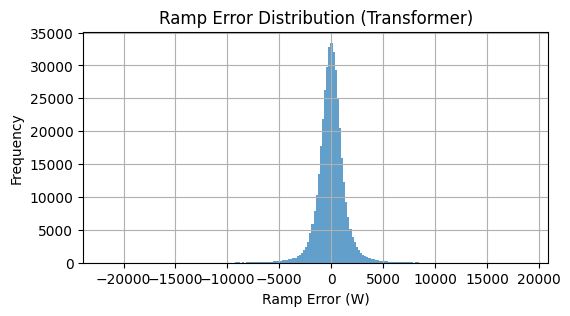

In [126]:
plt.figure(figsize=(6,3))
plt.hist(ramp_true.flatten() - ramp_t.flatten(), bins=200, alpha=0.7)
plt.title("Ramp Error Distribution (Transformer)")
plt.xlabel("Ramp Error (W)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

Ramp Forecasting Performance:
Ramp accuracy is critical for PV-rich grids due to the operational stress induced by rapid power fluctuations.
The Transformer achieved a ramp MAE of 0.95 kW and an RMSE of 1.41 kW, representing a 51% improvement over the persistence baseline (ramp MAE: 1.96 kW, RMSE: 3.16 kW).
Positive ramps (associated with clear-sky transitions) and negative ramps (associated with cloud-induced power drops) exhibited comparable errors (1.23 kW vs 1.29 kW), indicating that the Transformer effectively models both rising and falling edges of the PV power curve.
Extreme ramps (95th percentile) exhibited elevated forecast error (2.22 kW), consistent with the inherent difficulty of predicting convective cloud events during monsoon periods.